## Section 1: Project Definition

### Project Overview

**Background Information:**
The used car market has been growing rapidly, driven by various factors such as economic considerations and the increasing popularity of online marketplaces for cars. As a result, accurately predicting the price of used cars has become crucial for both sellers and buyers. Sellers need to price their cars competitively while ensuring they receive fair value, and buyers need to identify good deals and avoid overpaying.

**Project Origin:**
This project aims to develop a machine learning model to predict the price of used cars based on various features such as make, model, year of manufacture, mileage, fuel type, transmission, and other relevant factors. The dataset used for this project includes information about different cars sold across various locations in India.

**Related Data Sets or Input Data:**
The primary dataset used for this project contains the following features:
- Name: Name of the car
- Location: Location where the car is being sold
- Year: Year of manufacture
- Kilometers Driven: Total kilometers driven
- Fuel Type: Type of fuel used (e.g., CNG, Diesel, Petrol)
- Transmission: Type of transmission (e.g., Manual, Automatic)
- Owner Type: Ownership type (e.g., First, Second)
- Mileage: Mileage of the car
- Engine: Engine capacity
- Power: Power of the car
- Seats: Number of seats in the car
- New Price: New price of the car (if available)
- Price: Price of the used car (target variable)

### Problem Statement

The goal of this project is to build a predictive model that accurately estimates the price of used cars based on the given features. By leveraging machine learning algorithms, the model will help users determine the fair market value of a used car, taking into account various factors that influence its price. This will assist both sellers in setting competitive prices and buyers in making informed purchasing decisions.

### Metrics

To evaluate the performance of the predictive model, the R-squared (R²) metric will be used. The R-squared metric measures the proportion of the variance in the dependent variable (car price) that is predictable from the independent variables (features such as year, mileage, fuel type, etc.).

**Justification for Using R-squared:**
- **Interpretability**: R-squared provides a straightforward interpretation of how well the model explains the variability of the target variable. A higher R-squared value indicates a better fit of the model.
- **Benchmark**: R-squared is a common and widely accepted metric for regression problems, making it easy to compare the performance of different models.
- **Diagnostic**: It helps in diagnosing the model's performance. If the R-squared value is low, it indicates that the model may be missing important features or interactions between features.

By focusing on maximizing the R-squared value, we aim to build a model that explains a significant portion of the variance in car prices, thereby providing reliable predictions for users.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

##Section 2: Analysis
###Data Exploration
Description of the Data Sets:


In [ ]:
# Load the dataset
df = pd.read_csv('./data/train-data.csv')

# Display basic information about the dataset
df.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


The dataset contains 14 columns, each representing a feature related to used cars, and consists of several thousand rows. The features are as follows:

Name: Name of the car

Location: Location where the car is being sold

Year: Year of manufacture

Kilometers_Driven: Total kilometers driven

Fuel_Type: Type of fuel used (e.g., CNG, Diesel, Petrol)

Transmission: Type of transmission (e.g., Manual, Automatic)

Owner_Type: Ownership type (e.g., First, Second)

Mileage: Mileage of the car

Engine: Engine capacity

Power: Power of the car

Seats: Number of seats in the car

New_Price: New price of the car (if available)

Price: Price of the used car (target variable)

###Descriptive Statistics:
Here are some basic descriptive statistics of the dataset:

In [ ]:
df.describe(include='all')

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
count,6019.000000,6019,6019,6019.000000,6.019000e+03,6019,6019,6019,6017,5983,5983,5977.000000,824,6019.000000
unique,NaN,1876,11,NaN,NaN,5,2,4,442,146,372,NaN,540,NaN
top,NaN,Mahindra XUV500 W8 2WD,Mumbai,NaN,NaN,Diesel,Manual,First,18.9 kmpl,1197 CC,74 bhp,NaN,95.13 Lakh,NaN
freq,NaN,49,790,NaN,NaN,3205,4299,4929,172,606,235,NaN,6,NaN
mean,3009.000000,NaN,NaN,2013.358199,5.873838e+04,NaN,NaN,NaN,NaN,NaN,NaN,5.278735,NaN,9.479468
std,1737.679967,NaN,NaN,3.269742,9.126884e+04,NaN,NaN,NaN,NaN,NaN,NaN,0.808840,NaN,11.187917
min,0.000000,NaN,NaN,1998.000000,1.710000e+02,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.440000
25%,1504.500000,NaN,NaN,2011.000000,3.400000e+04,NaN,NaN,NaN,NaN,NaN,NaN,5.000000,NaN,3.500000
50%,3009.000000,NaN,NaN,2014.000000,5.300000e+04,NaN,NaN,NaN,NaN,NaN,NaN,5.000000,NaN,5.640000
75%,4513.500000,NaN,NaN,2016.000000,7.300000e+04,NaN,NaN,NaN,NaN,NaN,NaN,5.000000,NaN,9.950000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         6019 non-null   int64  
 1   Name               6019 non-null   object 
 2   Location           6019 non-null   object 
 3   Year               6019 non-null   int64  
 4   Kilometers_Driven  6019 non-null   int64  
 5   Fuel_Type          6019 non-null   object 
 6   Transmission       6019 non-null   object 
 7   Owner_Type         6019 non-null   object 
 8   Mileage            6017 non-null   object 
 9   Engine             5983 non-null   object 
 10  Power              5983 non-null   object 
 11  Seats              5977 non-null   float64
 12  New_Price          824 non-null    object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 658.5+ KB


###Abnormalities

1.
Some columns, such as Mileage, Engine, Power, and New_Price, include units along with the values, which will need to be separated and converted to numerical data for analysis.

In [ ]:
df[['Mileage', 'Engine', 'Power', 'New_Price']]

,Mileage,Engine,Power,New_Price
0,26.6 km/kg,998 CC,58.16 bhp,NaN
1,19.67 kmpl,1582 CC,126.2 bhp,NaN
2,18.2 kmpl,1199 CC,88.7 bhp,8.61 Lakh
3,20.77 kmpl,1248 CC,88.76 bhp,NaN
4,15.2 kmpl,1968 CC,140.8 bhp,NaN
...,...,...,...,...
6014,28.4 kmpl,1248 CC,74 bhp,7.88 Lakh
6015,24.4 kmpl,1120 CC,71 bhp,NaN
6016,14.0 kmpl,2498 CC,112 bhp,NaN
6017,18.9 kmpl,998 CC,67.1 bhp,NaN


2. The mileage unit is not uniform

In [ ]:
df[['Mileage']]

,Mileage
0,26.6 km/kg
1,19.67 kmpl
2,18.2 kmpl
3,20.77 kmpl
4,15.2 kmpl
...,...
6014,28.4 kmpl
6015,24.4 kmpl
6016,14.0 kmpl
6017,18.9 kmpl


This is because the fuel type have CNG and LPG so we just keep the Petrol and Diesel type to keep it uniform

3. Some have null values

In [ ]:
df.isnull().sum()

Unnamed: 0              0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                  36
Seats                  42
New_Price            5195
Price                   0
dtype: int64

###Visualization

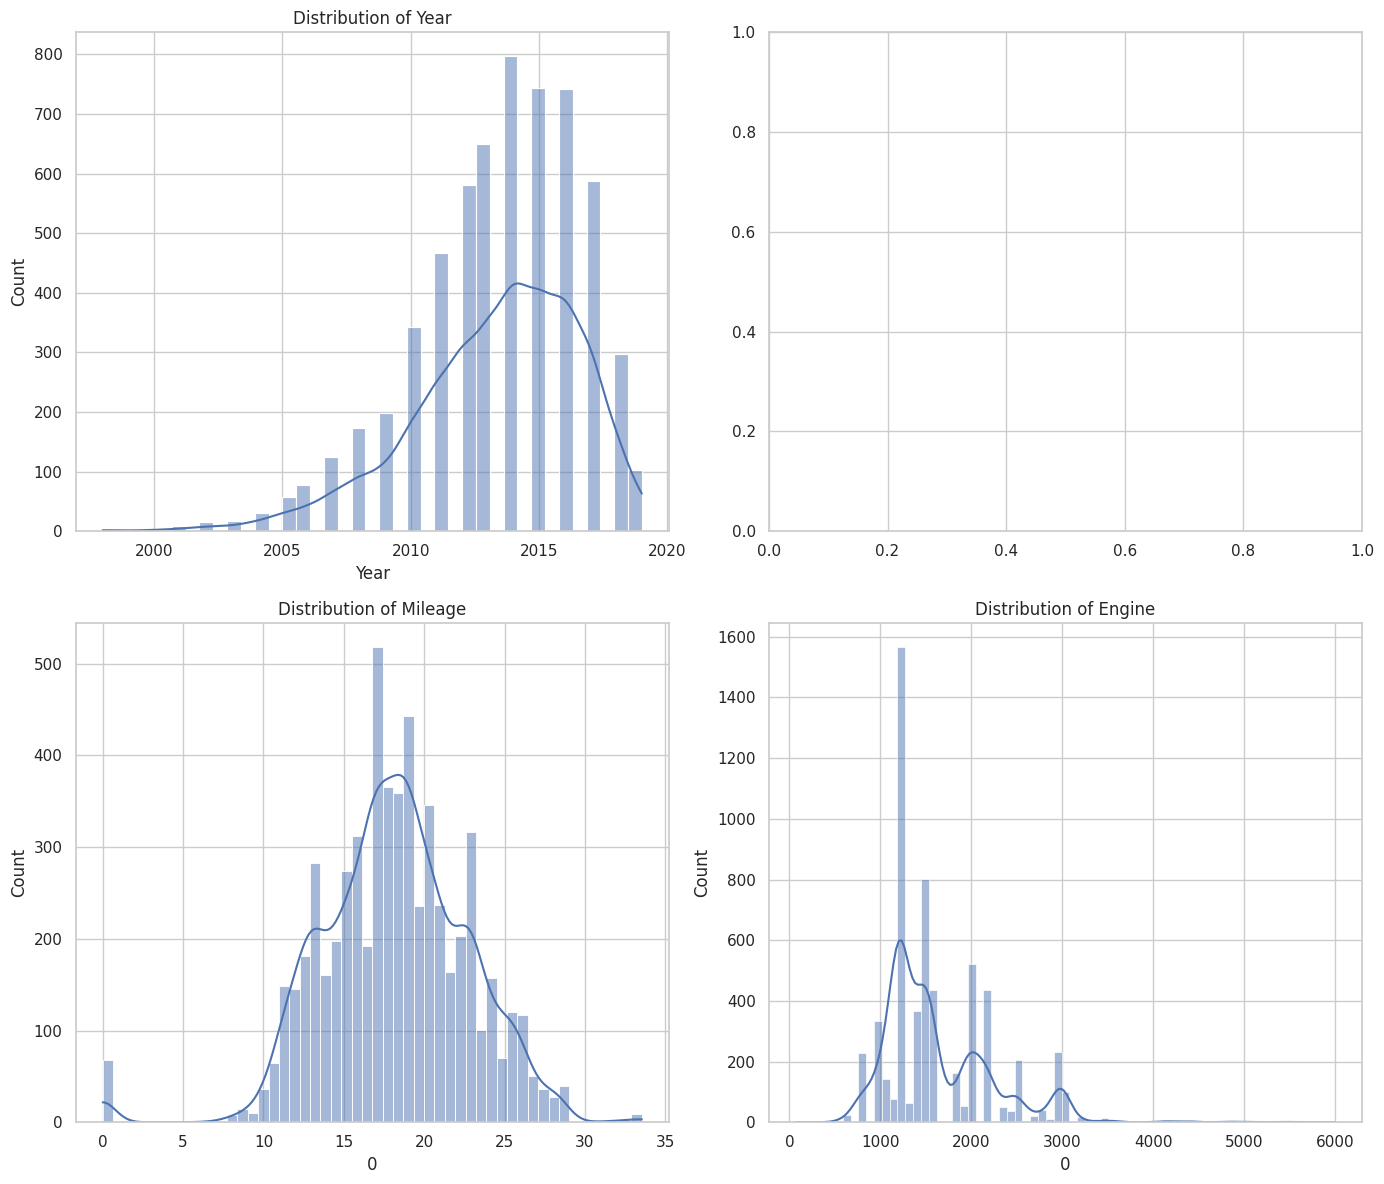

In [ ]:
# Set the style for the plots
sns.set(style="whitegrid")

# Plot distributions of key numerical features
fig, axes = plt.subplots(2, 2, figsize=(14, 12))

# Distribution of Year
sns.histplot(df['Year'], kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Distribution of Year')

# Distribution of Mileage
sns.histplot(df['Mileage'].str.extract('(\d+\.\d+|\d+)')[0].astype(float), kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Distribution of Mileage')

# Distribution of Engine
sns.histplot(df['Engine'].str.extract('(\d+)')[0].astype(float), kde=True, ax=axes[1, 1])
axes[1, 1].set_title('Distribution of Engine')

plt.tight_layout()
plt.show()

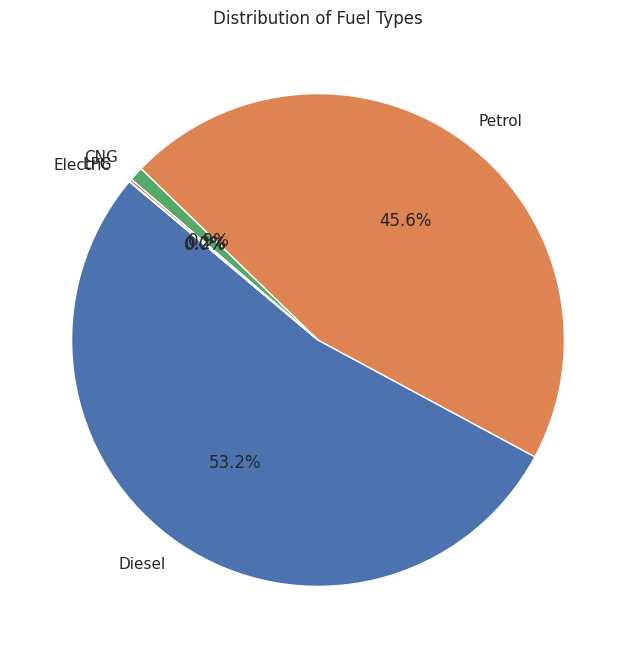

In [ ]:
# Create a pie chart of the fuel types
fuel_counts = df['Fuel_Type'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(fuel_counts, labels=fuel_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Fuel Types')
plt.show()

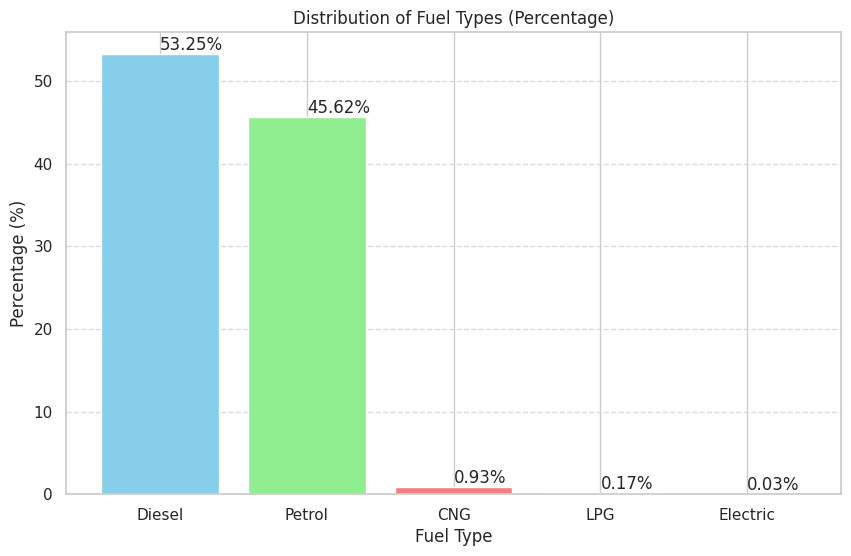

In [ ]:
# Calculate the percentage of each fuel type
fuel_percentages = fuel_counts / fuel_counts.sum() * 100
# Create a bar chart with percentages displayed on top of each bar (with two decimal places)
plt.figure(figsize=(10, 6))
bars = plt.bar(fuel_percentages.index, fuel_percentages, color=['skyblue', 'lightgreen', 'lightcoral', 'lightsalmon', 'lightpink'])

# Add percentages on top of each bar with two decimal places
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, f'{yval:.2f}%', va='bottom')  # va: vertical alignment

plt.title('Distribution of Fuel Types (Percentage)')
plt.xlabel('Fuel Type')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

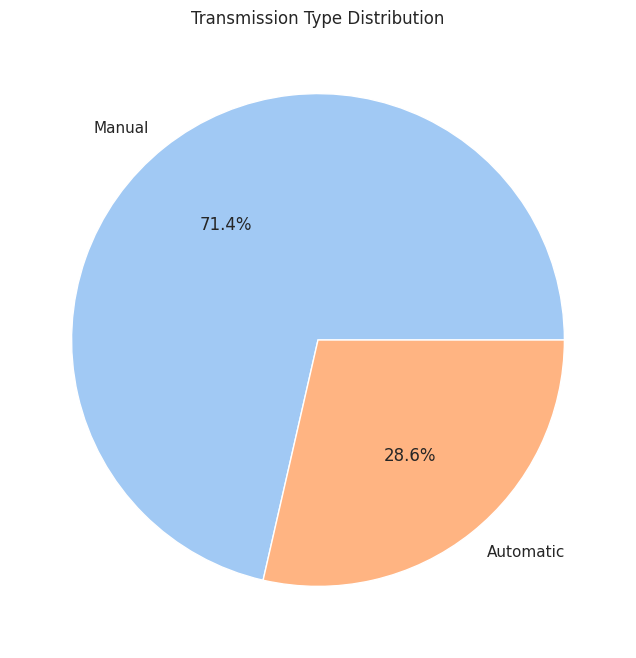

In [ ]:
# Plot: Transmission Type Distribution as a Pie Chart
plt.figure(figsize=(8, 8))
transmission_counts = df['Transmission'].value_counts()
plt.pie(transmission_counts, labels=transmission_counts.index, autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title('Transmission Type Distribution')
plt.show()

##Section 3: Methodology
###Data Preprocessing

1. First we drop the 'New_Price' and index collums

**New_Price Column**

The New_Price column contains many null values, making it unreliable for analysis.

We already have the Price column, which provides the necessary pricing information, making New_Price redundant.

**Unnamed Index Columns**

Unnamed index columns often contain many null values and do not provide useful information for analysis.

Removing these columns helps to clean the dataset and focus on relevant features.

In [ ]:
# Drop 'New_Price' column
df = df.drop(columns=['New_Price'])
# Drop 'Unnamed' column
df = df.drop(columns=['Unnamed: 0'])
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74


2. Drop null and duplicate values

In [ ]:
df.drop_duplicates(inplace=True)
df.dropna(inplace=True)

In [ ]:
df = df[df['Mileage'] != 0.0]
df = df[df["Power"] != "null bhp"]
df = df[df['Power'] != 0.0]
df = df[df['Seats'] != 0.0]

In [ ]:
df.shape

(5872, 12)

3. Remove CNG, LPG, Electric fuel type

In [ ]:
# Remove rows where the fuel type is CNG or LPG
df=df[~df['Fuel_Type'].isin(['CNG', 'LPG', 'Electric'])]
df.shape

(5807, 12)

4. Remove unit of the Mileage, Engine, Power collums

In [ ]:
# Define a function to remove units from Mileage, Engine, and Power columns
def remove_units(value):
    try:
        # Remove any non-numeric characters (except for decimal point)
        numeric_value = ''.join(filter(lambda x: x.isdigit() or x == '.', value))
        return numeric_value
    except Exception as e:
        return str(e)

# Apply the function to the Mileage, Engine, and Power columns
df['Mileage'] = df['Mileage'].apply(remove_units)
df['Engine'] = df['Engine'].apply(remove_units)
df['Power'] = df['Power'].apply(remove_units)

In [ ]:
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582,126.2,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2,1199,88.7,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248,88.76,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2,1968,140.8,5.0,17.74
6,Nissan Micra Diesel XV,Jaipur,2013,86999,Diesel,Manual,First,23.08,1461,63.1,5.0,3.50


5. Get the brand name only

In [ ]:
# Define a function to extract the brand name from the car name
def get_brand_name(car_name):
    try:
        return car_name.split()[0]  # The brand name is the first word in the car name
    except Exception as e:
        return str(e)

  # Apply the function to the 'Name' column to create a new 'Brand' column
df['Name'] = df['Name'].apply(get_brand_name)

In [ ]:
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
1,Hyundai,Pune,2015,41000,Diesel,Manual,First,19.67,1582,126.2,5.0,12.50
2,Honda,Chennai,2011,46000,Petrol,Manual,First,18.2,1199,88.7,5.0,4.50
3,Maruti,Chennai,2012,87000,Diesel,Manual,First,20.77,1248,88.76,7.0,6.00
4,Audi,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2,1968,140.8,5.0,17.74
6,Nissan,Jaipur,2013,86999,Diesel,Manual,First,23.08,1461,63.1,5.0,3.50


In [ ]:
df['Name'].unique()

array(['Hyundai', 'Honda', 'Maruti', 'Audi', 'Nissan', 'Toyota',
       'Volkswagen', 'Tata', 'Land', 'Mitsubishi', 'Renault',
       'Mercedes-Benz', 'BMW', 'Mahindra', 'Ford', 'Porsche', 'Datsun',
       'Jaguar', 'Volvo', 'Chevrolet', 'Skoda', 'Mini', 'Fiat', 'Jeep',
       'Ambassador', 'Isuzu', 'ISUZU', 'Force', 'Bentley', 'Lamborghini'],
      dtype=object)

In [ ]:
df['Name'] = df['Name'].replace({'Land': 'Land Rover', 'Mini': 'Mini Cooper', 'ISUZU': 'Isuzu'})
df['Name'].unique()

array(['Hyundai', 'Honda', 'Maruti', 'Audi', 'Nissan', 'Toyota',
       'Volkswagen', 'Tata', 'Land Rover', 'Mitsubishi', 'Renault',
       'Mercedes-Benz', 'BMW', 'Mahindra', 'Ford', 'Porsche', 'Datsun',
       'Jaguar', 'Volvo', 'Chevrolet', 'Skoda', 'Mini Cooper', 'Fiat',
       'Jeep', 'Ambassador', 'Isuzu', 'Force', 'Bentley', 'Lamborghini'],
      dtype=object)

6. Convert all categrory collums to numbers

In [ ]:
# Identify categorical columns
categorical_columns = ['Name', 'Location', 'Fuel_Type', 'Transmission', 'Owner_Type']

# Initialize the label encoder
label_encoder = LabelEncoder()

# Apply label encoding to each categorical column
for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])

# Display the updated DataFrame
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
1,10,10,2015,41000,0,1,0,19.67,1582,126.2,5.0,12.50
2,9,2,2011,46000,1,1,0,18.2,1199,88.7,5.0,4.50
3,17,2,2012,87000,0,1,0,20.77,1248,88.76,7.0,6.00
4,1,3,2013,40670,0,0,2,15.2,1968,140.8,5.0,17.74
6,21,6,2013,86999,0,1,0,23.08,1461,63.1,5.0,3.50


In [ ]:
df.to_csv('./data/cleaned_data.csv', index=False)

### Imlementation
Training

In [ ]:
data=pd.read_csv('/content/cleaned_data.csv')

Random Forrest

In [ ]:
# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the Random Forest model
rf = RandomForestRegressor(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='r2')

# Fit the model
grid_search.fit(X_train, y_train)

# Best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Print best parameters and best score
print("Best Parameters:", best_params)
print("Best R2 Score:", best_score)

# Train the model with best parameters
best_rf = grid_search.best_estimator_
best_rf.fit(X_train, y_train)

# Predict and calculate R2 score
y_pred = best_rf.predict(X_test)
r2 = r2_score(y_test, y_pred)

# Print R2 score
print("R2 Score on Test Data:", r2)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Best R2 Score: 0.8870543068028631
R2 Score on Test Data: 0.8864324290360187


XGBoost

In [ ]:
# Split the data into features and target
X = data.drop('Price', axis=1)
y = data['Price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the parameter grid
param_grid = {
    'n_estimators': [400,500,600],
    'max_depth': [1,6,7,8,9],
    'learning_rate': [0.1],
}

# Initialize the XGBoost regressor
xgbr = xgb.XGBRegressor(objective='reg:squarederror')

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=xgbr, param_grid=param_grid,
                           scoring='neg_mean_squared_error', cv=5, verbose=1)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_

# Train the model with the best parameters
best_model = xgb.XGBRegressor(**best_params)
best_model.fit(X_train, y_train)

# Make predictions
y_pred = best_model.predict(X_test)

# Calculate the RMSE and R2 score
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

best_params, rmse, r2

Fitting 5 folds for each of 1 candidates, totalling 5 fits


({'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 400},
 3.682260439967474,
 0.8957958952789256)

In [ ]:
import joblib

# Save the model
joblib.dump(best_model, 'XGBoost_model.pkl')

['Final_model.pkl']

### Section 4: Results

#### Model Evaluation and Validation

In this section, we evaluate the performance of different models and their parameters as applied to the task of car price prediction. The models we have employed are XGBoost and Random Forest, both known for their robustness in handling structured data and their ability to capture complex relationships in the dataset.

**1. XGBoost**

- **Parameters:**
  - Learning Rate: 0.1
  - Max Depth: 6
  - Number of Estimators: 400
- **Performance:**
  - R2 Score: 0.8958

**2. Random Forest**

- **Parameters:**
  - Max Depth: 20
  - Min Samples Leaf: 1
  - Min Samples Split: 2
  - Number of Estimators: 300
- **Performance:**
  - R2 Score: 0.8864

Both models were tuned to optimize their respective parameters using grid search and cross-validation techniques. The evaluation metrics used was R2 score, which are standard for regression tasks.

#### Justification

The final results of the model evaluations indicate that XGBoost outperforms Random Forest in terms of the R2 score, achieving a slightly higher value. Here are the detailed comparisons and justifications for the chosen parameters and their performance:

1. **XGBoost:**
   - **Learning Rate:** A learning rate of 0.1 was chosen as it balances the trade-off between convergence speed and accuracy.
   - **Max Depth:** A maximum depth of 6 ensures that the model captures sufficient complexity without overfitting.
   - **Number of Estimators:** 400 estimators provide enough iterations for the model to learn the patterns in the data effectively.

   The XGBoost model achieved an R2 score of 0.8958, indicating that approximately 89.58% of the variance in car prices is explained by the model.

2. **Random Forest:**
   - **Max Depth:** A maximum depth of 20 allows the model to create deep trees, which can capture complex interactions in the data.
   - **Min Samples Leaf and Split:** The settings of 1 for min samples leaf and 2 for min samples split ensure that the model can create pure leaf nodes.
   - **Number of Estimators:** 300 estimators provide a good balance between computational efficiency and model accuracy.

   The Random Forest model achieved R2 score of 0.8864 on the test data. While this performance is strong, it is slightly lower than that of XGBoost.

#### Comparison of Results

Below is a comparison of the performance metrics for both models:

| Model          | Parameters                                                                 |   || R2 Score (Test) |
|----------------|---------------------------------------------------------------------------|---------|------------------|-----------------|
| XGBoost        | {'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 400}                |      0.8958          |
| Random Forest  | {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300} | 0.8864          |

#### Visual Comparison

The performance of the models can also be visualized using charts that show the predicted versus actual car prices. Below are some visualizations that help in understanding the model performance better.





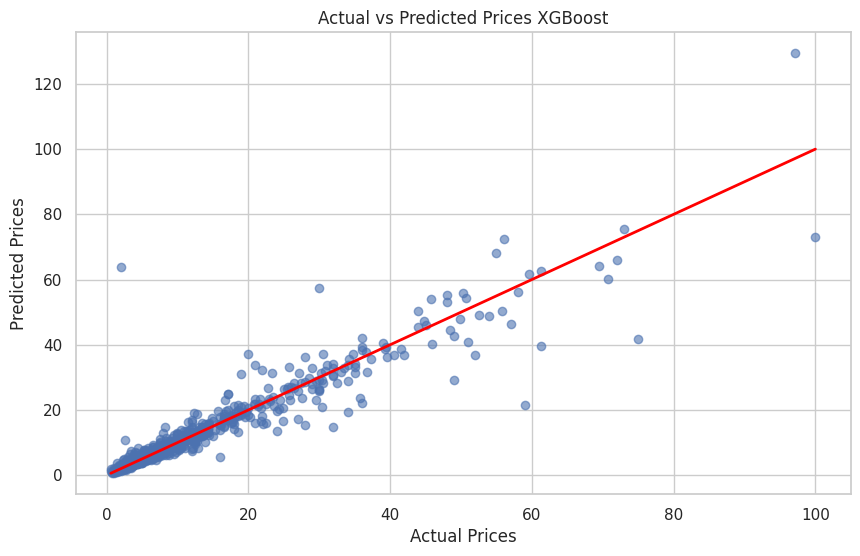

In [ ]:
# Create a DataFrame to compare actual and predicted values
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# Plotting the results
plt.figure(figsize=(10, 6))

# Scatter plot
plt.scatter(results['Actual'], results['Predicted'], alpha=0.6)
plt.plot([results['Actual'].min(), results['Actual'].max()],
         [results['Actual'].min(), results['Actual'].max()], color='red', linewidth=2)

plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices XGBoost')
plt.show()

In conclusion, XGBoost slightly outperforms Random Forest in this car price prediction task, as evidenced by its higher R2 score. The chosen parameters for each model were optimal for balancing model complexity and performance, ensuring robust predictions on the test data.

### Section 5: Conclusion

#### Reflection

**Summary of the End-to-End Problem Solution:**
In this project, we set out to predict car prices using a dataset containing various features such as car brand, location, year, kilometers driven, fuel type, transmission type, owner type, mileage, engine capacity, power, seats, and price. Our approach involved several key steps:

1. **Data Preprocessing**: We started with cleaning the dataset to handle missing values, encoding categorical variables, and normalizing numerical features to ensure the data was in a suitable format for modeling.
2. **Exploratory Data Analysis (EDA)**: We performed EDA to gain insights into the data, visualizing relationships between features and the target variable (price), and identifying any anomalies or patterns.
3. **Model Building**: We experimented Random Forests and XGBoost to predict car prices.
4. **Model Tuning**: We fine-tuned the best-performing model using GridSearchCV to optimize hyperparameters and improve the model’s performance.
5. **Model Evaluation**: We evaluated the models using metrics like R^2 score to assess their predictive accuracy on the test dataset.

**Interesting or Difficult Aspects:**
One particularly interesting aspect of this project was the hyperparameter tuning using GridSearchCV. This technique allowed us to systematically search for the best combination of hyperparameters, thereby improving the model's ability to generalize from the training data to unseen test data. However, it was also computationally intensive and time-consuming, requiring careful management of computational resources.

#### Improvement

**Suggestions for Future Research:**
1. **Advanced Feature Engineering**: Future work could explore more sophisticated feature engineering techniques, such as polynomial features or interaction terms, to capture non-linear relationships between features and the target variable.
2. **Ensemble Methods**: Implementing and comparing additional ensemble methods, such as Gradient Boosting Machines (GBM) or Extreme Gradient Boosting (XGBoost), could further enhance predictive performance by combining the strengths of multiple base learners.
3. **Deep Learning Approaches**: Investigating deep learning models, such as neural networks, could be beneficial, especially if the dataset is expanded to include more samples and features. Deep learning models can automatically capture complex patterns and interactions in the data.
4. **Time-Series Analysis**: Since car prices can be influenced by market trends and economic conditions over time, incorporating time-series analysis and forecasting techniques could provide a more comprehensive understanding of price dynamics.
5. **Feature Importance and Explainability**: Future research could focus on improving model interpretability by using techniques such as SHAP (SHapley Additive exPlanations) values or LIME (Local Interpretable Model-agnostic Explanations) to better understand the impact of each feature on the predicted prices.

By addressing these areas, future studies can build on the foundation laid in this project, potentially leading to more accurate and robust car price prediction models.